# Tutorial de Regresión logística


##Fundamentos Teóricos y Matemáticos de la Regresión Logística

### Introducción
La regresión logística (Logistic Regression, LR) es un modelo estadístico utilizado para la clasificación binaria. A diferencia de la regresión lineal, la regresión logística modela la probabilidad de que una observación pertenezca a una clase determinada utilizando la función sigmoide.

### Función Sigmoide
La regresión logística se basa en la función sigmoide, que transforma una variable real en un valor en el rango \((0,1)\):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

donde:
- $$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$ es la combinación lineal de los parámetros del modelo.
- $$sigma(z)$$ representa la probabilidad de pertenecer a la clase positiva (1).

### Modelo Matemático
La probabilidad de que una observación pertenezca a la clase 1 se expresa como:

$$
P(Y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \sum_{i=1}^{n} \beta_i x_i)}}
$$

Para la clase 0:

$$
P(Y = 0 | X) = 1 - P(Y = 1 | X)
$$

Reformulando en términos del **logit**, obtenemos la ecuación logit:

$$
\log \left( \frac{P(Y=1 | X)}{1 - P(Y=1 | X)} \right) = \beta_0 + \sum_{i=1}^{n} \beta_i x_i
$$

### Estimación de Parámetros
Los parámetros \( \beta \) se estiman mediante **Máxima Verosimilitud**, que busca maximizar la probabilidad de los datos observados. La función de verosimilitud es:

$$
L(\beta) = \prod_{i=1}^{m} P(y_i | x_i) = \prod_{i=1}^{m} \sigma(z_i)^{y_i} (1 - \sigma(z_i))^{1 - y_i}
$$

La función log-verosimilitud es:

$$
\ell(\beta) = \sum_{i=1}^{m} \left[y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right]
$$

La optimización de esta función se realiza generalmente mediante **gradiente descendente** o el **método de Newton-Raphson**.


##Importar librerías necesarias

In [118]:
# importación de librerías
import numpy as np  # operaciones matemáticas y arrays
import pandas as pd  # manipulación y análisis de dataframes
import matplotlib.pyplot as plt  # gráficos
import seaborn as sns  # gráficos
from sklearn.datasets import load_iris  # cargar el dataset Iris
from sklearn.model_selection import train_test_split  # dividir datos en train/test

# modelo de machine learning
from sklearn.linear_model import LogisticRegression  # algoritmo de regresión logística

# métricas de evaluación
from sklearn.metrics import (
    accuracy_score,  # calcula la precisión global del modelo
    confusion_matrix,  # muestra aciertos y errores por clase
    classification_report  # genera reporte detallado (precision, recall, f1-score)
)

##1. Cargar el dataset

Creamos un dataset sintético bien balanceado para clasificación utilizando `iris` de `scikit-learn`. Además, imprimimos parte del dataset para inspeccionarlo.

In [119]:
# cargar el dataset
iris = load_iris()

# crear un dataframe para inspeccionar los datos
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target] #añadir columna de especies

# mostrar dataframe
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


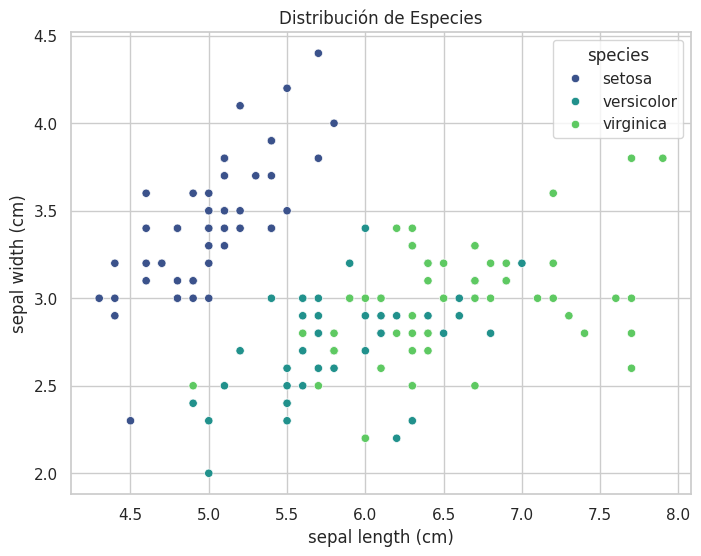

In [120]:
# graficar el dataset
plt.figure(figsize=(8,6))
sns.scatterplot(data=iris_df,
               x='sepal length (cm)',
               y='sepal width (cm)',
               hue='species',
               palette='viridis')
plt.title("Distribución de Especies")
plt.show()

##Preprocesamiento

De ser necesario, se escalan los datos. En este caso no es necesario. Creamos un pairplot para ver las relaciones entre variables, así como una matriz de correlación y su respectivo heatmap.

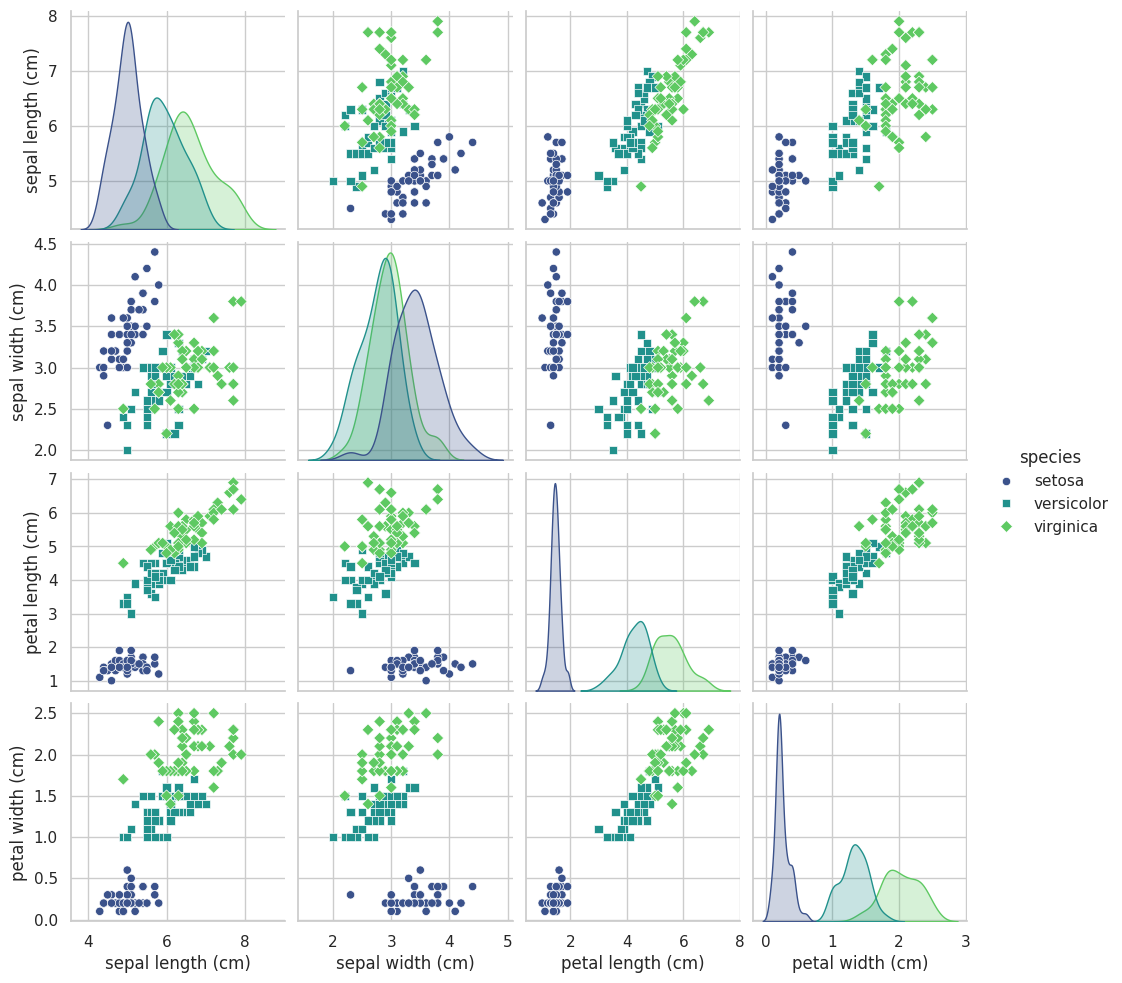

In [121]:
# crear pairplot
sns.pairplot(iris_df, hue='species', palette='viridis', markers=['o', 's', 'D'])
plt.show()

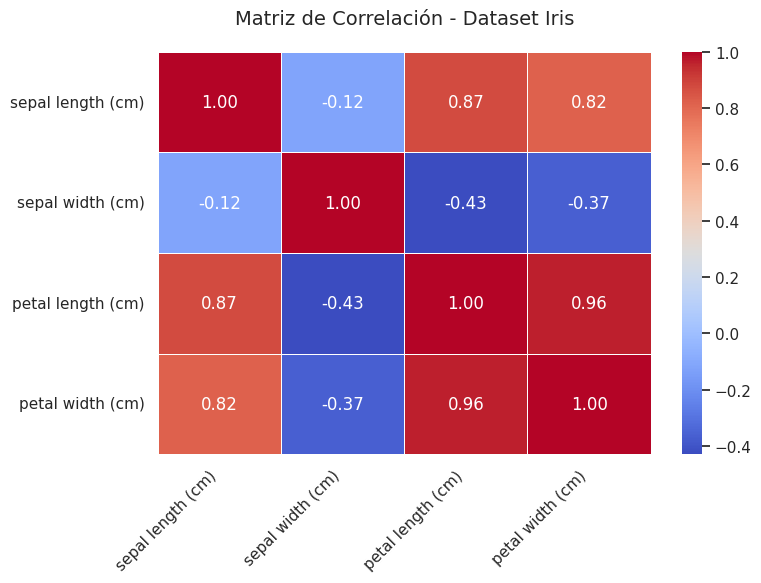

In [122]:
# calcular matriz de correlación
correlation_matrix = iris_df.corr(numeric_only=True)

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 12})

plt.title('Matriz de Correlación - Dataset Iris', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


La diagonal principal tiene valores 1 (correlación perfecta de una variable consigo misma)

Las correlaciones más fuertes en el dataset iris son:

*   petal length (cm) y petal width (cm) (≈0.96)
*   petal length (cm) y sepal length (cm) (≈0.87)



##División de datos

Dividimos el dataset en conjuntos de entrenamiento y prueba utilizando train_test_split. Esta función toma los siguientes parámetros:
* `X`: Las características del dataset.
* `y`: Las etiquetas del dataset.
* `test_size`: El porcentaje de datos que se utilizarán para prueba (en este caso, 20%).
* `random_state`: Semilla para reproducibilidad.

La función devuelve cuatro arrays:

* `X_train`: Características de entrenamiento.
* `X_test`: Características de prueba.
* `y_train`: Etiquetas de entrenamiento.
* `y_test`: Etiquetas de prueba.


In [123]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=123  #semilla para reproducibilidad
)

# Mostrar tamaños de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')
print(f'\nDistribución de clases en entrenamiento: {np.bincount(y_train)}')
print(f'Distribución de clases en prueba: {np.bincount(y_test)}')

Tamaño del conjunto de entrenamiento: 120 muestras
Tamaño del conjunto de prueba: 30 muestras

Distribución de clases en entrenamiento: [37 44 39]
Distribución de clases en prueba: [13  6 11]


##Entrenamiento del modelo
Para el rntrenamiento del Modelo, utilizamos LogisticRegression de scikit-learn para entrenar el modelo

In [124]:
# creación y entrenamiento del modelo
model = LogisticRegression(
    penalty='l2',           # regularización L2 (ridge)
    C=1.0,                 # fuerza de regularización inversa
    solver='lbfgs',        # algoritmo para problemas multiclase
    max_iter=100,          # máximo de iteraciones
)

model.fit(X_train, y_train)

# resultados
print("Coeficientes por clase:\n", model.coef_)
print("\nInterceptos por clase:", model.intercept_)
print("\nNúmero de iteraciones realizadas:", model.n_iter_[0])

Coeficientes por clase:
 [[-0.41577708  0.95909675 -2.41048014 -1.00844741]
 [ 0.48802097 -0.18023337 -0.20079421 -0.81752318]
 [-0.07224389 -0.77886338  2.61127434  1.82597059]]

Interceptos por clase: [  9.32096645   1.88022755 -11.201194  ]

Número de iteraciones realizadas: 100


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Evaluación del modelo
Evaluamos el modelo utilizando la métrica de exactitud (accuracy) y la matriz de confusión.

En el caso de este dataset, Iris tiene un accuracy muy alto (incluso 100%) porque es un conjunto de datos pequeño, balanceado y linealmente separable. Las características (como longitud y ancho de pétalos) son altamente discriminativas, especialmente para la clase setosa, que es fácil de distinguir. Las clases versicolor y virginica tienen cierto solapamiento, pero al usar las 4 variables juntas, un modelo lineal como la regresión logística puede encontrar patrones claros para separarlas.

In [125]:
y_pred = model.predict(X_test)
print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")

Exactitud: 1.00


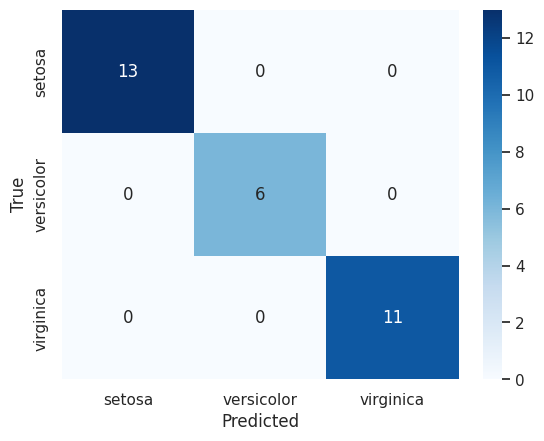

In [126]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [127]:
print(classification_report(y_test, y_pred,
                          target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###Evaluación del modelo con ruido

Exactitud con ruido: 0.8866666666666667

=== Reporte de Clasificación (con ruido) ===
              precision    recall  f1-score   support

      setosa       0.96      1.00      0.98        50
  versicolor       0.84      0.82      0.83        50
   virginica       0.86      0.84      0.85        50

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


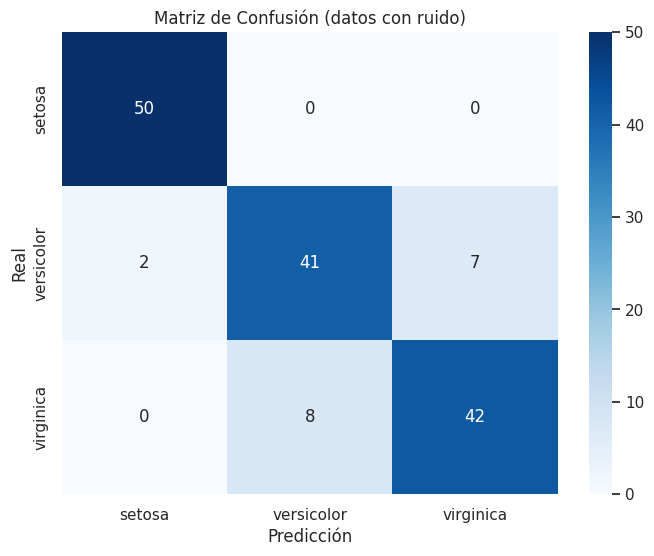

In [128]:
X_noisy = X + np.random.normal(0, 0.5, size=X.shape)
model.fit(X_noisy, y)
print("Exactitud con ruido:", model.score(X_noisy, y))

# generar predicciones con datos ruidosos
y_pred_noisy = model.predict(X_noisy)

# reporte de clasificación
print("\n=== Reporte de Clasificación (con ruido) ===")
print(classification_report(y, y_pred_noisy, target_names=iris.target_names))

# matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y, y_pred_noisy),
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Matriz de Confusión (datos con ruido)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

##Predicciones
Finalmente, usamos el modelo entrenado para clasificar nuevos datos.

In [129]:
# datos de ejemplo para predecir (formato: [sepal_length, sepal_width, petal_length, petal_width])
nuevas_flores = [[5.1, 3.5, 1.4, 0.2],
                 [6.7, 3.0, 5.2, 2.3]]

# hacer predicción
predicciones = model.predict(nuevas_flores)

# mostrar resultados
print("Predicciones:", predicciones)
print("Clases predichas:", [iris.target_names[p] for p in predicciones])

Predicciones: [0 2]
Clases predichas: [np.str_('setosa'), np.str_('virginica')]


##Conclusión
La Regresión Logística es un algoritmo muy importante para problemas de clasificación, ya que es simple. Aunque es un modelo lineal, su uso de la función sigmoide permite estimar probabilidades, y técnicas como la regularización (L1/L2) evitan el sobreajuste.